# Covid-19 in the Philippines

Data as of October 1, 2022

Source: DOH Data Drop

Metadata: https://docs.google.com/spreadsheets/d/1rD77PMdxN6JMVeYmk7mvgDNtEHJt8Du6ozaLm_Qok0Q/edit#gid=1714687638

Download the CSV files from the DOH Data Drop and save them within the PATH. We'll start by combining the four CSVs into one data frame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
pd.set_option("display.max_columns", None)
df = pd.concat(
    map(pd.read_csv, ['DOH COVID Data Drop_ 20221001 - 04 Case Information_batch_0.csv', 'DOH COVID Data Drop_ 20221001 - 04 Case Information_batch_1.csv', 'DOH COVID Data Drop_ 20221001 - 04 Case Information_batch_2.csv', "DOH COVID Data Drop_ 20221001 - 04 Case Information_batch_3.csv"]), ignore_index=True)
df

/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_16441/2466406973.py:2: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_16441/2466406973.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.


,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,Admitted,RegionRes,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C404174,38.0,35 to 39,FEMALE,NaN,2020-01-30,2020-01-30,NaN,NaN,RECOVERED,NO,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,"Health Status is ""Recovered"", but no Date Reco..."
1,C462688,44.0,40 to 44,MALE,NaN,2020-01-30,2020-02-03,2020-02-01,NaN,DIED,NO,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,DIED,NO,2020-01-18,NaN,NaN
2,C387710,60.0,60 to 64,FEMALE,2020-01-23,2020-01-30,2020-02-05,NaN,2020-01-31,RECOVERED,YES,Region VII: Central Visayas,BOHOL,PANGLAO,PH071233000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,Case has Admitting Facility but is not Admitte...
3,C498051,63.0,60 to 64,MALE,2020-03-05,NaN,2020-03-06,2020-03-11,NaN,DIED,NO,Region IV-A: CALABARZON,RIZAL,CAINTA,PH045805000,NaN,NaN,DIED,NO,NaN,NaN,"Case has Lab Result, but Result Date is blank\..."
4,C377460,49.0,45 to 49,MALE,NaN,NaN,2020-03-06,NaN,NaN,RECOVERED,NO,Region IV-A: CALABARZON,BATANGAS,SANTO TOMAS,PH041028000,NaN,NaN,RECOVERED,NO,NaN,NaN,Case has Admitting Facility but is not Admitte...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951761,C23306494,43.0,40 to 44,MALE,2022-09-29,2022-09-29,2022-10-01,NaN,NaN,NaN,NO,NCR,NCR,CITY OF MARIKINA,PH137402000,TUMANA,PH137402016,MILD,NO,NaN,NaN,NaN
3951762,C87974283,29.0,25 to 29,FEMALE,2022-09-29,2022-09-29,2022-10-01,NaN,NaN,NaN,NO,NCR,NCR,CITY OF MARIKINA,PH137402000,MALANDAY,PH137402005,MILD,NO,2022-09-26,NO,NaN
3951763,C93509692,33.0,30 to 34,MALE,2022-09-29,2022-09-29,2022-10-01,NaN,NaN,NaN,NO,Region VI: Western Visayas,ANTIQUE,CULASI,PH060606000,CONDES,PH060606017,MILD,NO,NaN,NaN,NaN
3951764,C51869157,43.0,40 to 44,FEMALE,2022-09-27,2022-09-28,2022-10-01,NaN,NaN,NaN,NO,NCR,NCR,CITY OF MANILA,PH133901000,BARANGAY 128,PH133901128,MILD,NO,NaN,NO,NaN


We basically combined all four CSVs into one file. 
You can save this single file into a CSV if you want to. 

In [3]:
df.DateRepConf = pd.to_datetime(df.DateRepConf, format="%Y-%m-%d")
df.DateDied = pd.to_datetime(df.DateDied, format="%Y-%m-%d")
df.DateRecover = pd.to_datetime(df.DateRecover, format="%Y-%m-%d")
df.DateOnset = pd.to_datetime(df.DateOnset, format="%Y-%m-%d")
df.DateResultRelease = pd.to_datetime(df.DateResultRelease, format="%Y-%m-%d")
df.DateSpecimen = pd.to_datetime(df.DateSpecimen, format="%Y-%m-%d")

In [4]:
df.dtypes
#This checks whether we successfully converted the columns above into datetime.

CaseCode                     object
Age                         float64
AgeGroup                     object
Sex                          object
DateSpecimen         datetime64[ns]
DateResultRelease    datetime64[ns]
DateRepConf          datetime64[ns]
DateDied             datetime64[ns]
DateRecover          datetime64[ns]
RemovalType                  object
Admitted                     object
RegionRes                    object
ProvRes                      object
CityMunRes                   object
CityMuniPSGC                 object
BarangayRes                  object
BarangayPSGC                 object
HealthStatus                 object
Quarantined                  object
DateOnset            datetime64[ns]
Pregnanttab                  object
ValidationStatus             object
dtype: object

In [5]:
df['CityMunRes'] = df['CityMunRes'].str.title()
df['ProvRes'] = df['ProvRes'].str.title()

# Cleaning the data

## Looking for duplicates

Look for potential duplicates through the all columns. **True** means there are duplicates **across all columns.**

In [6]:
df.duplicated().value_counts()

False    3951754
True          12
dtype: int64

**As of Oct. 1, 2022, 12 duplicates** found in the report.

DOH, in its daily case reports, continuously clean the data and regularly reports and removes duplicates.

In the meantime, we will be **keeping the duplicates** for the purpose of our analysis. We are confident that because duplicates account for less than 1% of the total, it won't affect the overall Covid-19 picture.

In [7]:
#df[df.duplicated(keep='first')].sort_values('Age')
#This supposedly shows the duplicated entries arranged by 'Age'. Remember, these entries are checked similar
#across all columns in at least another entry. They are just arranged by age.

## Handling NaN values

There are also issues with **NaNs** which means there was no data input. One issue I stumbled upon quite belatedly was the fact that **'CaseCode'** indicator actually has a lot of null values (see below).

In [8]:
df.CaseCode.isna().value_counts()

False    3951765
True           1
Name: CaseCode, dtype: int64

One NaN detected as of this latest update. This means we can easily **resample** the cases (with the lone NaN not being included).

Previously though, there were over **60,000** null values under **CaseCode** which prompted us to use other columns (**Sex**) to analyze. Below we see however that the Sex column now has more NaNs.

In [9]:
df.Sex.isna().value_counts()

False    3951765
True           1
Name: Sex, dtype: int64

# Case data

Note: Just remove **.tail()** to get all dates here. **.tail()** shows the last entries while the number inside paranthesis signify how many last entries are shown. Default shows last 10 entries. Alternatively: **.head()**

## DateRepConf

Pertains to data when cases are publicly reported **(this is what is closely followed and reported in the media).** Caveat is this can include case positives from previous days because of delays in test processing and reporting.

For instance, cases may be reported on January 2, but based on testing data on December 31.

Furthemore, data from previous days may be subject to change as DOH said it is constantly reviewing the reports' veracity and removing some potential duplicates.

In [10]:
cases = df.resample('D', on='DateRepConf').CaseCode.count().to_frame().reset_index()
cases.tail()

,DateRepConf,CaseCode
971,2022-09-27,1554
972,2022-09-28,1500
973,2022-09-29,2538
974,2022-09-30,2489
975,2022-10-01,3822


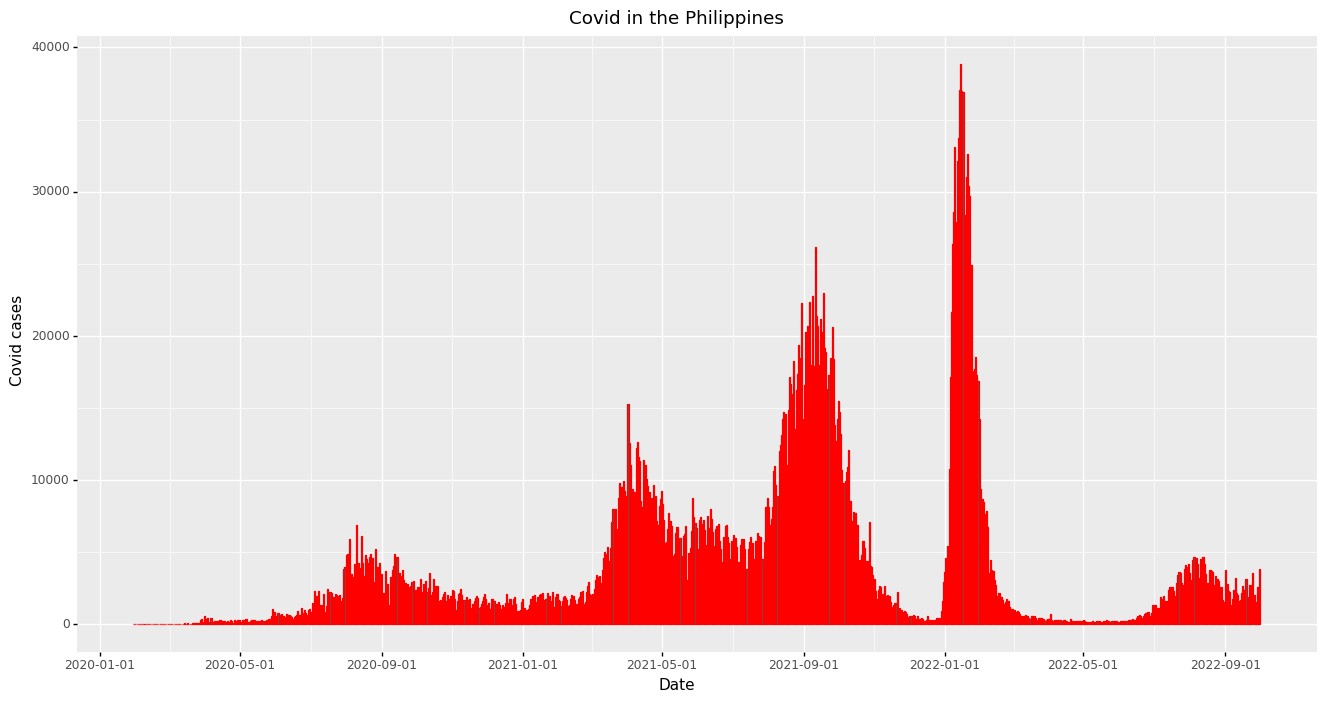

<ggplot: (322841417)>

In [11]:
(
    ggplot(cases, aes('DateRepConf', 'CaseCode')) +
           geom_col(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)

# Two week rolling case average

You can change the time frame of the rolling average by changing the number of **days** inside the paranthesis after **rolling.**

In [12]:
df.resample('D', on='DateRepConf').CaseCode.count().rolling(14).mean().round().tail(20)

DateRepConf
2022-09-12    2271.0
2022-09-13    2264.0
2022-09-14    2275.0
2022-09-15    2161.0
2022-09-16    2173.0
2022-09-17    2136.0
2022-09-18    2139.0
2022-09-19    2205.0
2022-09-20    2225.0
2022-09-21    2236.0
2022-09-22    2258.0
2022-09-23    2264.0
2022-09-24    2230.0
2022-09-25    2326.0
2022-09-26    2324.0
2022-09-27    2323.0
2022-09-28    2308.0
2022-09-29    2337.0
2022-09-30    2329.0
2022-10-01    2439.0
Freq: D, Name: CaseCode, dtype: float64

In [13]:
case_roll = df.resample('D', on='DateRepConf').CaseCode.count().rolling(14).mean().to_frame().reset_index()
case_roll= case_roll.round(0)

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:381: PlotnineWarning: position_stack : Removed 13 rows containing missing values.


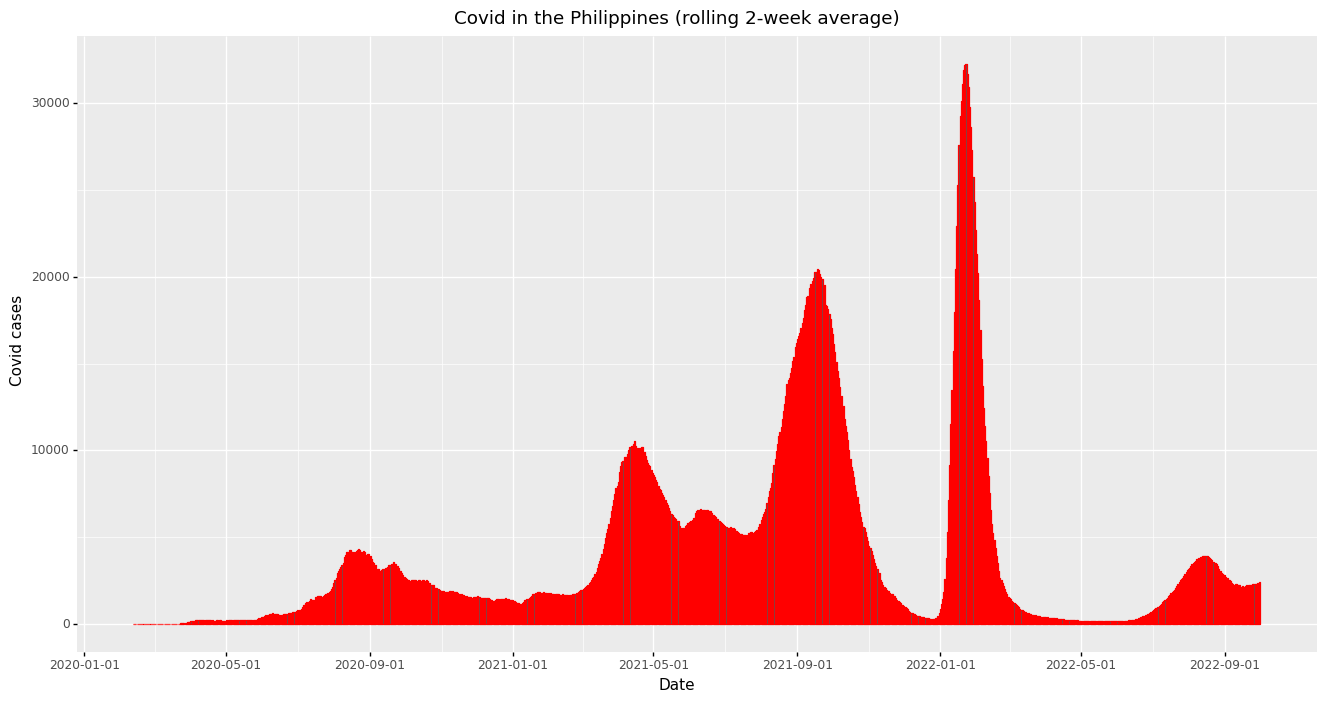

<ggplot: (342141916)>

In [14]:
(
    ggplot(case_roll, aes('DateRepConf', 'CaseCode')) +
           geom_col(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines (rolling 2-week average)")
)

## DateOnset

Pertains to cases when date of illness or when symptoms manifest. Sometimes, people are not tested until cases manifest and processing of cases take time. DateOnset records cases based on when the illness first manifested, not when test results were released.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing, see below) as proxy.

In [15]:
df.resample('D', on='DateOnset').CaseCode.count().tail(10)

DateOnset
2022-09-20    638
2022-09-21    532
2022-09-22    421
2022-09-23    457
2022-09-24    465
2022-09-25    395
2022-09-26    399
2022-09-27    359
2022-09-28    183
2022-09-29     31
Name: CaseCode, dtype: int64

## DateSpecimen

Pertains to when specimen was collected from suspected case for Covid-19 testing. Data show those who tested positive after testing, but date used to report case is based on when the specimen is collected, instead of when results came out positive.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing) as proxy.

In [16]:
df.resample('D', on='DateSpecimen').CaseCode.count().tail(10)

DateSpecimen
2022-09-20    2665
2022-09-21    2725
2022-09-22    2564
2022-09-23    2492
2022-09-24    1928
2022-09-25    1246
2022-09-26    2163
2022-09-27    2827
2022-09-28    2063
2022-09-29     548
Name: CaseCode, dtype: int64

## DateRecover

Pertains to date when cases recovered from Covid-19. Not used in reporting "recoveries" data every day. 

In [17]:
df[df.HealthStatus=="RECOVERED"].resample('D', on='DateRepConf').size().tail(10)

DateRepConf
2022-09-22    2218
2022-09-23     636
2022-09-24     508
2022-09-25     138
2022-09-26      70
2022-09-27      26
2022-09-28      19
2022-09-29      42
2022-09-30      19
2022-10-01     249
Freq: D, dtype: int64

## DateDied

Pertains to date when cases died from Covid-19. Not used in reporting "deaths" data every day. 

In [18]:
df[df.RemovalType=="DIED"].resample('D', on='DateDied').size().tail(10)

DateDied
2022-09-18    5
2022-09-19    3
2022-09-20    3
2022-09-21    3
2022-09-22    7
2022-09-23    5
2022-09-24    3
2022-09-25    4
2022-09-26    2
2022-09-27    4
dtype: int64

Note: Clearly when used to resample, DateRecovered and DateDied columns underestimate both figures as reported. This can be due to a number of reasons, including some deaths and recoveries bearing no date.

# Which regions have the highest number of Covid-19 cases so far?

In [19]:
regions = df.RegionRes.value_counts(dropna=False).reset_index()
regions.head()
#ROF stands for returning overseas Filipinos
#Over 3,300 have no indicated regional location.

,index,RegionRes
0,NCR,1270907
1,Region IV-A: CALABARZON,707192
2,Region III: Central Luzon,389668
3,Region VI: Western Visayas,209476
4,Region VII: Central Visayas,203615


Interpretation: Nearly half of Covid-19 cases were detected in Metro Manila and Calabarzon.

# Which provinces have the highest number of Covid-19 cases so far?

In [20]:
provinces = df.groupby('RegionRes').ProvRes.value_counts(dropna=False).to_frame()
provinces.head()

ProvRes
RegionRes ProvRes                                
BARMM     Lanao Del Sur                      8135
          Maguindanao                        7478
          Cotabato City (Not A Province)     7097
          Basilan                            1865
          Sulu                               1682

# Clean provincial column for mapping later

We are mapping the Covid-19 cases and to do that, we need to ensure that labels of our dataframe are similar to that of our shapefile. One of the differences we take note was the presence of **four NCR districts** for provincial type of data on our **shapefile**. 

NCR is only under **one label** for our Covid-19 tally, hence, we need to change that.

In [21]:
provinces.columns = ['cases'] #rename columns

In [22]:
provinces.reset_index(inplace=True)
provinces= provinces.drop('RegionRes', axis=1) #drop region column
provinces= provinces.rename(columns={"ProvRes": "province"}) #rename province column for merging with NCR district

In [23]:
provinces

,province,cases
0,Lanao Del Sur,8135
1,Maguindanao,7478
2,Cotabato City (Not A Province),7097
3,Basilan,1865
4,Sulu,1682
...,...,...
97,South Cotabato,44625
98,Cotabato (North Cotabato),16389
99,Sultan Kudarat,10115
100,Sarangani,8650


# NCR by municipality

Now, we need to segregate data on NCR cases by municipality before we **merge this with our provinces dataframe**.

Below, we start with creating a dataframe for cases on municipal level.

In [24]:
municipalities = df.CityMunRes.value_counts(dropna=False).to_frame().reset_index()
municipalities

,index,CityMunRes
0,Quezon City,266176
1,City Of Manila,159555
2,City Of Makati,92776
3,City Of Pasig,92456
4,Taguig City,91358
...,...,...
1432,Hadji Panglima Tahil (Marunggas),4
1433,Tapul,3
1434,Cotabato City <Poblacion>,3
1435,Mapun (Cagayan De Tawi-Tawi),3


## Rename columns to match those of provinces

We will use **province** and **cases**.

In [25]:
municipalities= municipalities.rename(columns={"index": "province"})
municipalities= municipalities.rename(columns={"CityMunRes": "cases"})
municipalities

,province,cases
0,Quezon City,266176
1,City Of Manila,159555
2,City Of Makati,92776
3,City Of Pasig,92456
4,Taguig City,91358
...,...,...
1432,Hadji Panglima Tahil (Marunggas),4
1433,Tapul,3
1434,Cotabato City <Poblacion>,3
1435,Mapun (Cagayan De Tawi-Tawi),3


## Segregate by NCR municipality

Now, we are good to go.

### First district

In [26]:
first = municipalities[municipalities.province=='City Of Manila']
first

,province,cases
1,City Of Manila,159555


### Second district

In [27]:
cities = ["Quezon City", "City Of Mandaluyong", "City Of San Juan", "City Of Pasig", "City Of Marikina"]
second = municipalities[municipalities['province'].isin(cities)].reset_index(drop=True)
second.loc["NCR, Second District"] = second.cases.sum() #add new row totaling all rows
second = second.drop([0,1,2,3,4], axis=0) #drops all rows except totals
second

,province,cases
"NCR, Second District",477323,477323


### Third district

In [28]:
cities = ["Caloocan City", "City Of Malabon", "City Of Navotas", "City Of Valenzuela"]
third = municipalities[municipalities['province'].isin(cities)].reset_index(drop=True)
third.loc["NCR, Third District"] = third.cases.sum()
third = third.drop([0,1,2,3], axis=0)
third

,province,cases
"NCR, Third District",193226,193226


### Fourth district

In [29]:
cities = ["City Of Las Piñas", "City Of Makati", "Taguig City", "Pasay City", "City Of Muntinlupa", "City Of Parañaque", "Pateros"]
fourth = municipalities[municipalities['province'].isin(cities)].reset_index(drop=True)
fourth.loc["NCR, Fourth District"] = fourth.cases.sum()
fourth = fourth.drop([0,1,2,3,4,5,6], axis=0)
fourth

,province,cases
"NCR, Fourth District",432461,432461


## Combine all districts into one dataframe

In [30]:
districts = pd.concat([first, second, third, fourth])
districts = districts.reset_index()

In [31]:
districts = districts.drop('province', axis=1)
districts= districts.rename(columns={"index": "province"})
districts

,province,cases
0,1,159555
1,"NCR, Second District",477323
2,"NCR, Third District",193226
3,"NCR, Fourth District",432461


## Combine provincial data with NCR by municipality data

In [32]:
provinces = pd.concat([provinces, districts])
provinces

,province,cases
0,Lanao Del Sur,8135
1,Maguindanao,7478
2,Cotabato City (Not A Province),7097
3,Basilan,1865
4,Sulu,1682
...,...,...
101,NaN,670
0,1,159555
1,"NCR, Second District",477323
2,"NCR, Third District",193226


## Save dataframes for mapping into CSVs

We are saving cleaned regional, provincial and municipal data into separate CSVs for easier access later. These CSVs will be combined and cleaned with shapefiles for mapping. Details on separate notebooks.

In [33]:
#regions.to_csv('regions.csv', index=False)
#provinces.to_csv('provinces-cases.csv', index=False)

# Track cases per day per province

Warning: This can be quite heavy because of the number of provinces (87) involved. But the beauty of this is you can save this df into a separate CSV (using the df name **'df_prov'**) if you'd like. 

Code also applicable to municipal, regional and barangay level. But be careful as the data get more granular as there could be some problem (see below).

### Wide data (pivot table)

In [34]:
df_prov = df.pivot_table(columns="ProvRes", index='DateRepConf', values='CaseCode', aggfunc='count', fill_value='0', dropna=False).reset_index()
df_prov.head(10)

ProvRes,DateRepConf,Abra,Agusan Del Norte,Agusan Del Sur,Aklan,Albay,Antique,Apayao,Aurora,Basilan,Bataan,Batanes,Batangas,Benguet,Biliran,Bohol,Bukidnon,Bulacan,Cagayan,Camarines Norte,Camarines Sur,Camiguin,Capiz,Catanduanes,Cavite,Cebu,City Of Isabela (Not A Province),Cotabato (North Cotabato),Cotabato City (Not A Province),Davao De Oro,Davao Del Norte,Davao Del Sur,Davao Occidental,Davao Oriental,Dinagat Islands,Eastern Samar,Guimaras,Ifugao,Ilocos Norte,Ilocos Sur,Iloilo,Isabela,Kalinga,La Union,Laguna,Lanao Del Norte,Lanao Del Sur,Leyte,Maguindanao,Marinduque,Masbate,Misamis Occidental,Misamis Oriental,Mountain Province,Ncr,Negros Occidental,Negros Oriental,Northern Samar,Nueva Ecija,Nueva Vizcaya,Occidental Mindoro,Oriental Mindoro,Palawan,Pampanga,Pangasinan,Quezon,Quirino,Rizal,Romblon,Samar (Western Samar),Sarangani,Siquijor,Sorsogon,South Cotabato,Southern Leyte,Sultan Kudarat,Sulu,Surigao Del Norte,Surigao Del Sur,Tarlac,Tawi-Tawi,Zambales,Zamboanga Del Norte,Zamboanga Del Sur,Zamboanga Sibugay
0,2020-01-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-06,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2020-03-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2020-03-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2020-03-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0
8,2020-03-11,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0
9,2020-03-12,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Wide data (total cases per province to date)

In [35]:
df_prov2 = df.pivot_table(index="ProvRes", values='CaseCode', aggfunc='count', fill_value='0', dropna=False).reset_index()
df_prov2.head(10)

,ProvRes,CaseCode
0,Abra,6306
1,Agusan Del Norte,23286
2,Agusan Del Sur,17429
3,Aklan,17090
4,Albay,15142
5,Antique,10384
6,Apayao,9538
7,Aurora,4421
8,Basilan,1865
9,Bataan,44296


### Long data

We create a **new dataframe** for plotnine later. Long data is always preferred when processing using plotnine.

In [36]:
df_prov2 = pd.melt(df_prov, id_vars=['DateRepConf'], value_name='CaseCode', \
                   var_name='province').sort_values('province')

In [37]:
df_prov2.CaseCode = df_prov2.CaseCode.astype(int)
df_prov2

,DateRepConf,province,CaseCode
0,2020-01-30,Abra,0
622,2021-11-15,Abra,2
623,2021-11-16,Abra,4
624,2021-11-17,Abra,1
625,2021-11-18,Abra,0
...,...,...,...
78587,2021-01-15,Zamboanga Sibugay,6
78588,2021-01-16,Zamboanga Sibugay,4
78589,2021-01-17,Zamboanga Sibugay,5
78577,2021-01-05,Zamboanga Sibugay,2


/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


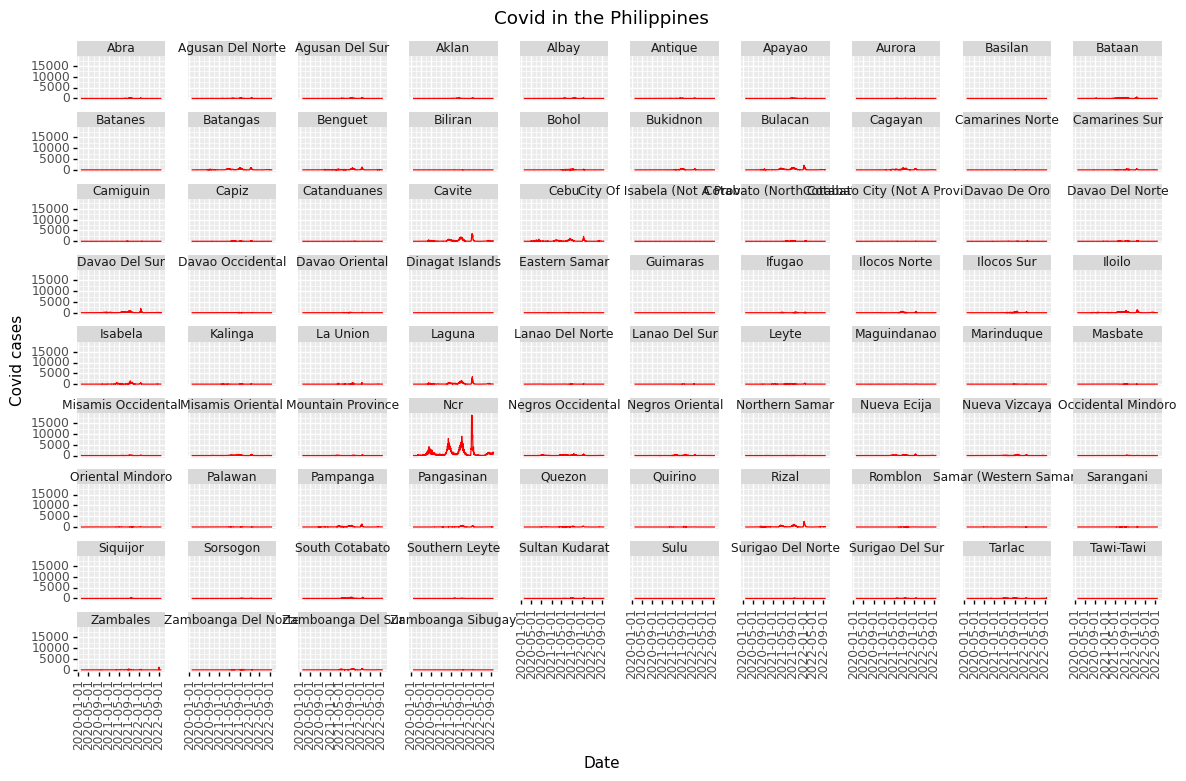

<ggplot: (326931384)>

In [38]:
#Plotnine chart
(
    ggplot(df_prov2, aes('DateRepConf', 'CaseCode')) +
           geom_line(color="red") +
           theme(figure_size=(14,8)) +
           facet_wrap('province') +
           theme(subplots_adjust={'wspace': 0.25}, axis_text_x=element_text(rotation=90)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)

# Track cases per day region

### Wide data 

Similar with provincial data. We have to go through this process to be able to extract **long data** since we would have to fill some null values.

In [39]:
df_reg = df.pivot_table(columns="RegionRes", index='DateRepConf', values='CaseCode', aggfunc='count', fill_value='0', dropna=False).reset_index()
df_reg.head(10)

RegionRes,DateRepConf,BARMM,CAR,CARAGA,NCR,ROF,Region I: Ilocos Region,Region II: Cagayan Valley,Region III: Central Luzon,Region IV-A: CALABARZON,Region IV-B: MIMAROPA,Region IX: Zamboanga Peninsula,Region V: Bicol Region,Region VI: Western Visayas,Region VII: Central Visayas,Region VIII: Eastern Visayas,Region X: Northern Mindanao,Region XI: Davao Region,Region XII: SOCCSKSARGEN
0,2020-01-30,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
1,2020-02-03,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
2,2020-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
3,2020-03-06,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0
4,2020-03-07,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0
5,2020-03-08,0,0,0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2020-03-09,0,0,0,11.0,1.0,0,0,1.0,1.0,0,0,0,0,0,0,0,0,0
7,2020-03-10,0,0,0,7.0,0,0,0,1.0,0,0,0,1.0,0,0,0,0,0,0
8,2020-03-11,0,0,1.0,12.0,1.0,0,0,0,1.0,0,0,0,0,1.0,0,0,0,0
9,2020-03-12,0,0,0,2.0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0


### Long data

We create a new data frame solely for regional data only for processing later with plotnine for charts.

In [40]:
df_reg2 = pd.melt(df_reg, id_vars=['DateRepConf'], value_name='CaseCode', var_name='province').sort_values('province')
df_reg2.CaseCode = df_reg2.CaseCode.astype(int)
df_reg2.reset_index(inplace=True)

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


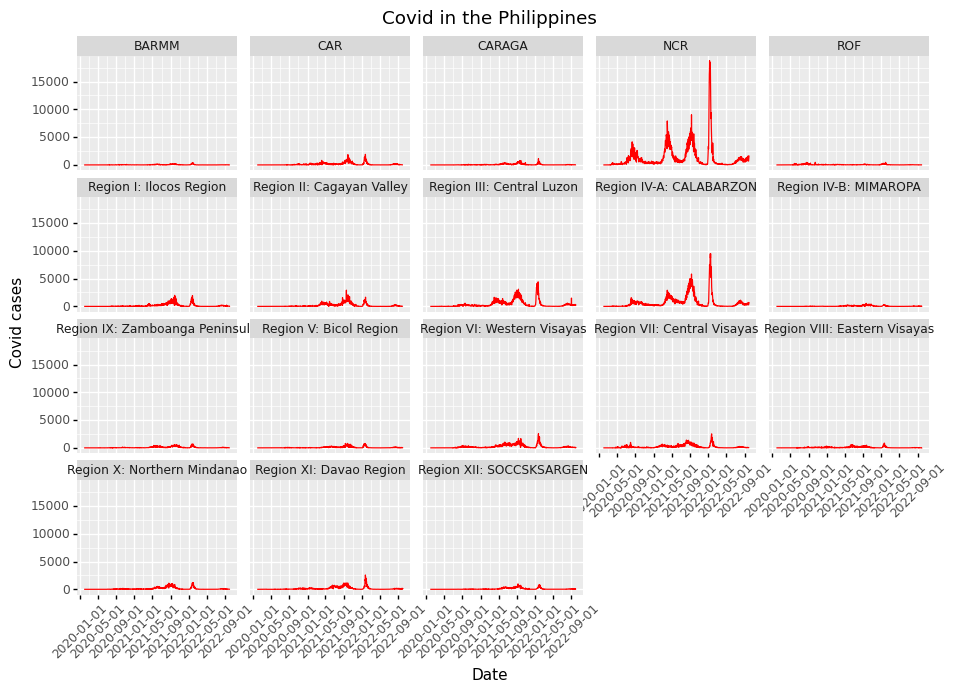

<ggplot: (379678931)>

In [41]:
plt=(
    ggplot(df_reg2, aes('DateRepConf', 'CaseCode')) +
           geom_line(color="red", stat="identity") +
           theme(figure_size=(11,7)) +
           facet_wrap('province') +
           theme(subplots_adjust={'wspace': 0.08}, axis_text_x=element_text(rotation=45)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)
plt
#ggsave(plt, "covid.svg")

# By municipality

This is quite heavy and would need some extensive data cleaning because of some municipalities with the same names. Remove the hashtags to run.

In [42]:
df_munc = df.CityMunRes.value_counts().sort_index()
df_munc = df.groupby("ProvRes").CityMunRes.value_counts().sort_index()
df_munc

ProvRes            CityMunRes       
Abra               Bangued (Capital)    1195
                   Boliney               197
                   Bucay                 338
                   Bucloc                118
                   Daguioman              91
                                        ... 
Zamboanga Sibugay  Roseller Lim          188
                   Siay                  444
                   Talusan                55
                   Titay                 486
                   Tungawan              279
Name: CityMunRes, Length: 1635, dtype: int64

# How is a location's infection tally through time (one loc at a time)?

Applicable for provinces, municipalities, regions.

In [43]:
#Example for region
df[df.RegionRes=="NCR"].resample('D', on='DateRepConf').CaseCode.count().tail(10)

DateRepConf
2022-09-22    1326
2022-09-23    1040
2022-09-24    1357
2022-09-25    1616
2022-09-26     964
2022-09-27     741
2022-09-28     687
2022-09-29    1143
2022-09-30    1313
2022-10-01    1692
Freq: D, Name: CaseCode, dtype: int64

In [44]:
#Example for municipalities
df[df.CityMunRes=="Quezon City"].resample('D', on='DateRepConf').CaseCode.count().tail(10)

DateRepConf
2022-09-22    299
2022-09-23    244
2022-09-24    343
2022-09-25    388
2022-09-26    200
2022-09-27    183
2022-09-28    179
2022-09-29    308
2022-09-30    339
2022-10-01    382
Freq: D, Name: CaseCode, dtype: int64

<AxesSubplot:title={'center':'QC cases'}, xlabel='DateRepConf'>

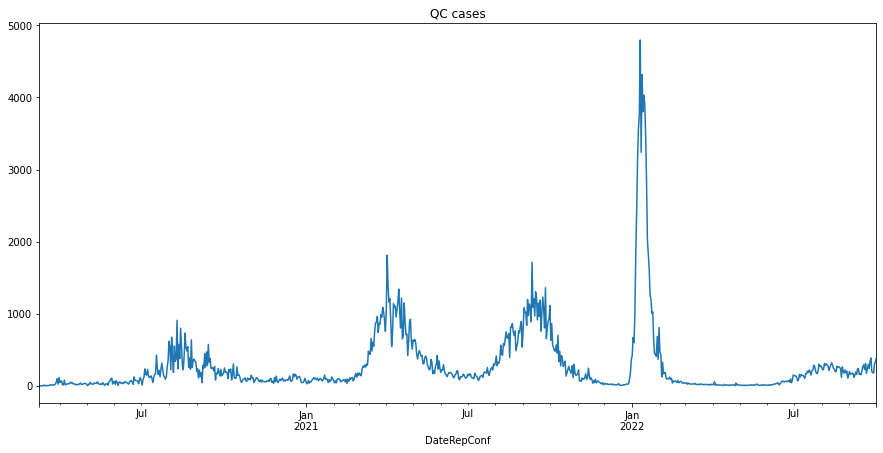

In [45]:
#Not plotnine but can be made one if made into a single df.
df[df.CityMunRes=="Quezon City"].resample('D', on='DateRepConf').CaseCode.count().plot(title="QC cases", figsize = (15, 7))

# How young/old are the infected?

In [46]:
df.AgeGroup.value_counts(normalize=True, dropna=False)*100
#0.1% of people infected did not indicate age.

25 to 29    14.567791
30 to 34    13.011094
20 to 24    10.197871
35 to 39     9.939885
40 to 44     8.360692
45 to 49     6.831072
50 to 54     6.249763
55 to 59     5.486914
60 to 64     4.360860
15 to 19     4.228084
65 to 69     3.284101
10 to 14     2.893365
70 to 74     2.401357
0 to 4       2.400041
5 to 9       2.294063
80+          1.833965
75 to 79     1.472278
NaN          0.186803
Name: AgeGroup, dtype: float64

# How many males and females? How many are admitted to hospital?

**normalize=True** will get you the percentage share.

In [47]:
df.Sex.value_counts(dropna=False, normalize=True) * 100
#Nearly equal number of females and males infected with Covid-19

FEMALE    51.288158
MALE      48.711816
NaN        0.000025
Name: Sex, dtype: float64

In [48]:
df.Admitted.value_counts(dropna=False)
#NaN means no answer

NO     3788100
YES     114060
NaN      49606
Name: Admitted, dtype: int64

# Testing

We now go to testing data, which is contained in a separate CSV file from the DOH Data Drop. We read through the file first.

Notice again how there are **NaNs** in some rows. Some of them you can ignore because of the type of data (i.e. **daily_output_unique_individuals** where NaN essentially means there were no test conducted that day.

You can check whether they have a significant impact on the broader picture by running **isna** in certain columns or putting **dropna=False** in your **value_counts**.

Try this:
df[df.daily_output_unique_individuals.isna()]

In [49]:
df_test = pd.read_csv("DOH COVID Data Drop_ 20221001 - 07 Testing Aggregates.csv")
df_test

,facility_name,report_date,avg_turnaround_time,daily_output_samples_tested,daily_output_unique_individuals,daily_output_positive_individuals,daily_output_negative_individuals,daily_output_equivocal,daily_output_invalid,remaining_available_tests,backlogs,cumulative_samples_tested,cumulative_unique_individuals,cumulative_positive_individuals,cumulative_negative_individuals,pct_positive_cumulative,pct_negative_cumulative,validation_status
0,A Star Laboratories,2020-12-08,24.0,15.0,15.0,1.0,14.0,0.0,0.0,8.0,0.0,15,15,1,14,0.07,0.93,NaN
1,A Star Laboratories,2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
2,A Star Laboratories,2020-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
3,A Star Laboratories,2020-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
4,A Star Laboratories,2020-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216180,Zamboanga del Sur Medical Center PCR Laboratory,2022-09-26,48.0,5.0,5.0,3.0,2.0,0.0,0.0,2704.0,0.0,42845,42459,11925,30534,0.28,0.72,NaN
216181,Zamboanga del Sur Medical Center PCR Laboratory,2022-09-27,48.0,7.0,7.0,6.0,1.0,0.0,0.0,2692.0,0.0,42852,42466,11931,30535,0.28,0.72,NaN
216182,Zamboanga del Sur Medical Center PCR Laboratory,2022-09-28,48.0,12.0,12.0,7.0,5.0,0.0,0.0,2670.0,0.0,42864,42478,11938,30540,0.28,0.72,NaN
216183,Zamboanga del Sur Medical Center PCR Laboratory,2022-09-29,48.0,14.0,14.0,5.0,9.0,0.0,0.0,2636.0,0.0,42878,42492,11943,30549,0.28,0.72,NaN


# Transform dates to datetime format

In [50]:
df_test.report_date = pd.to_datetime(df_test.report_date, format="%Y-%m-%d", errors="coerce")

In [51]:
df_test

,facility_name,report_date,avg_turnaround_time,daily_output_samples_tested,daily_output_unique_individuals,daily_output_positive_individuals,daily_output_negative_individuals,daily_output_equivocal,daily_output_invalid,remaining_available_tests,backlogs,cumulative_samples_tested,cumulative_unique_individuals,cumulative_positive_individuals,cumulative_negative_individuals,pct_positive_cumulative,pct_negative_cumulative,validation_status
0,A Star Laboratories,2020-12-08,24.0,15.0,15.0,1.0,14.0,0.0,0.0,8.0,0.0,15,15,1,14,0.07,0.93,NaN
1,A Star Laboratories,2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
2,A Star Laboratories,2020-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
3,A Star Laboratories,2020-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
4,A Star Laboratories,2020-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216180,Zamboanga del Sur Medical Center PCR Laboratory,2022-09-26,48.0,5.0,5.0,3.0,2.0,0.0,0.0,2704.0,0.0,42845,42459,11925,30534,0.28,0.72,NaN
216181,Zamboanga del Sur Medical Center PCR Laboratory,2022-09-27,48.0,7.0,7.0,6.0,1.0,0.0,0.0,2692.0,0.0,42852,42466,11931,30535,0.28,0.72,NaN
216182,Zamboanga del Sur Medical Center PCR Laboratory,2022-09-28,48.0,12.0,12.0,7.0,5.0,0.0,0.0,2670.0,0.0,42864,42478,11938,30540,0.28,0.72,NaN
216183,Zamboanga del Sur Medical Center PCR Laboratory,2022-09-29,48.0,14.0,14.0,5.0,9.0,0.0,0.0,2636.0,0.0,42878,42492,11943,30549,0.28,0.72,NaN


# Look for null values

Again, nulls are not counted when resampling.

In [52]:
df_test.daily_output_unique_individuals.isna().value_counts()

False    200042
True      16143
Name: daily_output_unique_individuals, dtype: int64

**Interpretation**: Over 16,000 null values, meaning there was no information provided.

In [53]:
df_test.daily_output_samples_tested.isna().value_counts()
#Same with samples.

False    200040
True      16145
Name: daily_output_samples_tested, dtype: int64

# Total number of people tested for Covid-19 daily

In [54]:
#Creating a new data frame for processing with plotnine
daily_test = df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().to_frame().reset_index()
daily_test.tail(12)
#shows last 12 days.

,report_date,daily_output_unique_individuals
899,2022-09-19,18450.0
900,2022-09-20,19768.0
901,2022-09-21,19904.0
902,2022-09-22,17644.0
903,2022-09-23,18509.0
904,2022-09-24,16283.0
905,2022-09-25,12080.0
906,2022-09-26,14402.0
907,2022-09-27,18710.0
908,2022-09-28,18559.0


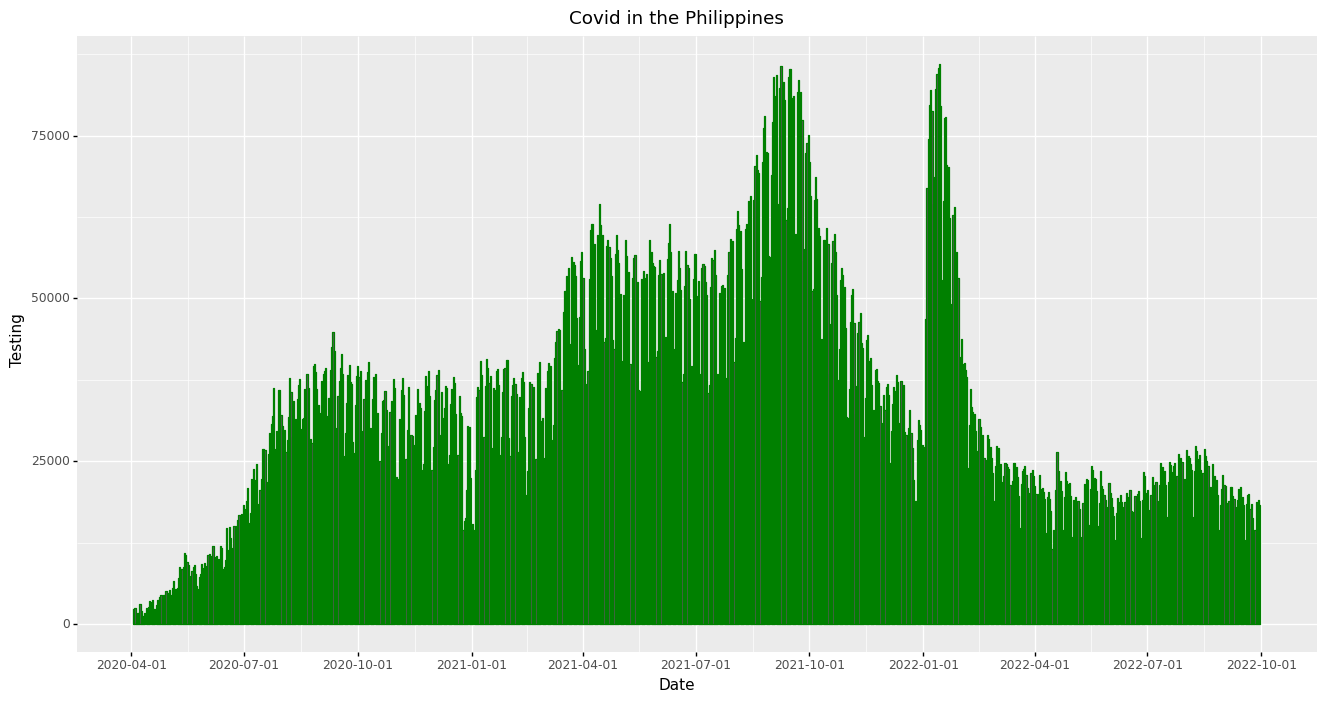

<ggplot: (380430054)>

In [55]:
#Plotnine chart
(
    ggplot(daily_test, aes('report_date', 'daily_output_unique_individuals')) +
           geom_col(color="green", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Testing", title="Covid in the Philippines")
)

Interpretation: Number of people getting tested for Covid-19 daily have gone down
from their September peak of about 80,000 during a surge. 

## 7-day rolling average

In [56]:
test_roll = df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().rolling(7).mean().to_frame().reset_index()
test_roll= test_roll.round(0)
test_roll.head(10)

,report_date,daily_output_unique_individuals
0,2020-04-03,NaN
1,2020-04-04,NaN
2,2020-04-05,NaN
3,2020-04-06,NaN
4,2020-04-07,NaN
5,2020-04-08,NaN
6,2020-04-09,1918.0
7,2020-04-10,1770.0
8,2020-04-11,1612.0
9,2020-04-12,1807.0


/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:381: PlotnineWarning: position_stack : Removed 6 rows containing missing values.


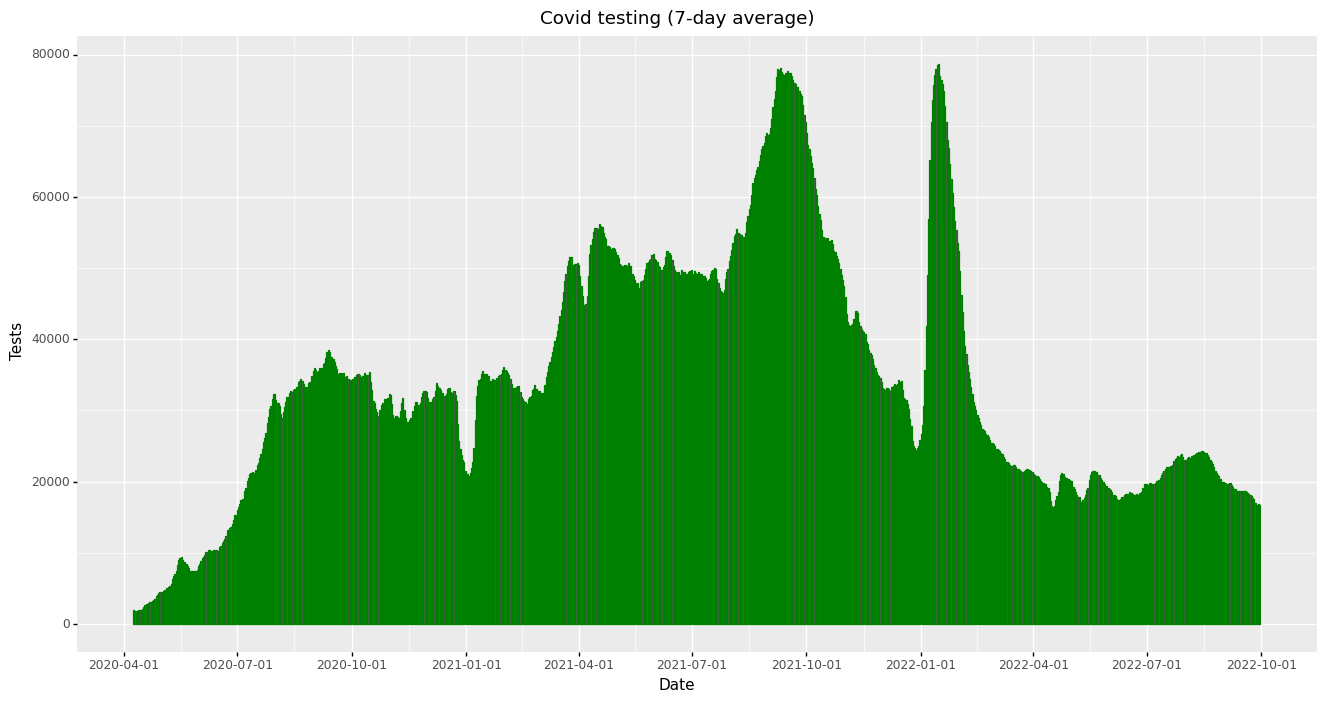

<ggplot: (380004782)>

In [57]:
(
    ggplot(test_roll, aes('report_date', 'daily_output_unique_individuals')) +
           geom_col(color="green", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Tests", title="Covid testing (7-day average)")
)

# Total samples tested each day

Number of samples may differ from number of individuals tested because some people undertake more than one test for confirmation.

Shows last 15 days.

In [58]:
df_test.resample('D', on='report_date').daily_output_samples_tested.sum().tail(15)

report_date
2022-09-16    21235.0
2022-09-17    19098.0
2022-09-18    13602.0
2022-09-19    19525.0
2022-09-20    21237.0
2022-09-21    21277.0
2022-09-22    19076.0
2022-09-23    19833.0
2022-09-24    17150.0
2022-09-25    12714.0
2022-09-26    15360.0
2022-09-27    19546.0
2022-09-28    19697.0
2022-09-29    20016.0
2022-09-30    19213.0
Freq: D, Name: daily_output_samples_tested, dtype: float64

# How many people are tested each month?

### Monthly totals arranged from highest to lowest

Remove **sort_values(ascending=False)** to arrange it by date.

In [59]:
df_test.resample('M', on='report_date').daily_output_unique_individuals.sum().sort_values(ascending=False)

report_date
2021-09-30    2270631.0
2022-01-31    1963574.0
2021-08-31    1876508.0
2021-10-31    1674413.0
2021-04-30    1571601.0
2021-07-31    1534308.0
2021-05-31    1525650.0
2021-06-30    1509758.0
2021-03-31    1377946.0
2021-11-30    1160857.0
2020-09-30    1073189.0
2020-10-31    1027587.0
2020-08-31    1017208.0
2021-01-31    1014680.0
2021-12-31     944796.0
2020-12-31     929690.0
2021-02-28     907116.0
2020-11-30     894039.0
2022-02-28     831737.0
2020-07-31     768799.0
2022-08-31     704633.0
2022-03-31     695398.0
2022-07-31     671570.0
2022-05-31     596854.0
2022-04-30     584820.0
2022-06-30     554524.0
2022-09-30     549045.0
2020-06-30     360461.0
2020-05-31     232199.0
2020-04-30      81089.0
Name: daily_output_unique_individuals, dtype: float64

<AxesSubplot:title={'center':'Testing slumps below 100k in Dec 2021'}, xlabel='report_date'>

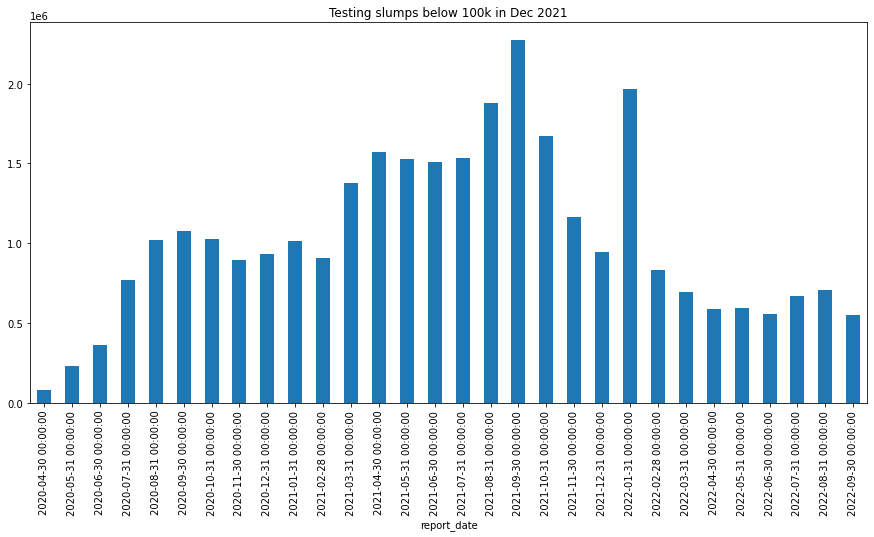

In [60]:
df_test.resample('M', on='report_date').daily_output_unique_individuals.sum().plot(kind="bar", title="Testing slumps below 100k in Dec 2021", figsize = (15, 7))


# Where do most positive individuals get tested?

Top 15

### Cumulative

In [61]:
df_test.groupby("facility_name").daily_output_positive_individuals.sum().sort_values(ascending=False).head(15)

facility_name
Detoxicare Molecular Diagnostics Laboratory                               181071.0
Philippine Red Cross - Port Area                                          179272.0
Philippine Red Cross (PRC)                                                103947.0
Baguio General Hospital and Medical Center                                 91184.0
Research Institute for Tropical Medicine (RITM)                            79289.0
Jose B. Lingad Memorial General Hospital                                   75537.0
Chinese General Hospital                                                   73809.0
Philippine Red Cross Logistics & Multipurpose Center                       73772.0
Cebu TB Reference Laboratory - Molecular Facility for COVID-19 Testing     66491.0
Cagayan Valley Medical Center Molecular Laboratory                         65496.0
Southern Philippines Medical Center (SPMC)                                 65233.0
The Lord's Grace Medical and Industrial Clinic                           

### Monthly 

Ranked from highest to lowest number of tests.

In [62]:
df_test.groupby("facility_name").resample('M', on='report_date').daily_output_positive_individuals.sum().sort_values(ascending=False).head(15)


facility_name                                   report_date
Detoxicare Molecular Diagnostics Laboratory     2022-01-31     35108.0
Philippine Red Cross - Port Area                2021-09-30     27547.0
                                                2022-01-31     26081.0
                                                2021-08-31     23943.0
Detoxicare Molecular Diagnostics Laboratory     2021-09-30     21316.0
Philippine Red Cross - Port Area                2021-04-30     20038.0
Detoxicare Molecular Diagnostics Laboratory     2021-04-30     18665.0
The Lord's Grace Medical and Industrial Clinic  2022-01-31     18634.0
Philippine Red Cross (PRC)                      2021-09-30     18480.0
Ilocos Training and Regional Medical Center     2021-09-30     17270.0
Philippine Airport Diagnostic Laboratory        2022-01-31     15908.0
Baguio General Hospital and Medical Center      2021-09-30     15865.0
Philippine Red Cross - Port Area                2021-03-31     15852.0
Detoxicare Molecu

### Per testing site per month

Just change the name of the testing site after **df2.facility_name** to check other facilities.
Data show total monthly tests conducted per each facility.

Make it per day by just changing **'M'** in **resample** to **'D'**.

In [63]:
df_test[df_test.facility_name=="Philippine Red Cross - Port Area"].resample('M', on='report_date').daily_output_positive_individuals.sum()


report_date
2020-05-31      205.0
2020-06-30      482.0
2020-07-31     7488.0
2020-08-31    10269.0
2020-09-30     8200.0
2020-10-31     1880.0
2020-11-30     2090.0
2020-12-31     2090.0
2021-01-31     1585.0
2021-02-28     3189.0
2021-03-31    15852.0
2021-04-30    20038.0
2021-05-31     8407.0
2021-06-30     4556.0
2021-07-31     5584.0
2021-08-31    23943.0
2021-09-30    27547.0
2021-10-31     4570.0
2021-11-30     1031.0
2021-12-31     1158.0
2022-01-31    26081.0
2022-02-28      593.0
2022-03-31      113.0
2022-04-30       25.0
2022-05-31       49.0
2022-06-30      266.0
2022-07-31      590.0
2022-08-31      830.0
2022-09-30      561.0
Freq: M, Name: daily_output_positive_individuals, dtype: float64

# How many individuals test positive every day?

In [64]:
df_test.resample('D', on='report_date').daily_output_positive_individuals.sum().tail(15)

report_date
2022-09-16    2848.0
2022-09-17    2553.0
2022-09-18    1685.0
2022-09-19    2614.0
2022-09-20    3107.0
2022-09-21    3171.0
2022-09-22    3004.0
2022-09-23    2822.0
2022-09-24    2487.0
2022-09-25    1710.0
2022-09-26    2005.0
2022-09-27    2835.0
2022-09-28    3233.0
2022-09-29    2913.0
2022-09-30    2727.0
Freq: D, Name: daily_output_positive_individuals, dtype: float64

# Turnaround time

The number of people that test positive each day does not match cases reported each day. And it's partly because of delays in testing results. Hence some results reported today could be from tests days ago. What's the average turnaround time in hours for tests?

In [65]:
df_test.avg_turnaround_time.value_counts().head(3)

24.0    59166
48.0    57015
8.0     10742
Name: avg_turnaround_time, dtype: int64

# Positivity rate

Computed by dividing the number of positive tests out of the total tests conducted each day. The World Health Organization considers 5% and below positivity rate as the virus spread being under control.

### Daily

We make a new dataframe for positivity rate for faster processing of data in succeeding analysis.
(Also, it throws an error merely putting **.plot()** at this code so making a new df for this solve that problem.
Below we only show the positivity rate for the last 30 days.

In [66]:
#Creating a new df to process in plotnine
df_pos = df_test.resample('D', on='report_date').daily_output_positive_individuals.sum() / df_test.resample('D', on='report_date').daily_output_unique_individuals.sum() * 100
df_pos2 = df_pos.to_frame().reset_index()

#Renaming the columns because one of them is '0'
df_pos2.columns = ['date', 'testing']
df_pos2.tail(10)


,date,testing
901,2022-09-21,15.931471
902,2022-09-22,17.025618
903,2022-09-23,15.246637
904,2022-09-24,15.273598
905,2022-09-25,14.155629
906,2022-09-26,13.921678
907,2022-09-27,15.152325
908,2022-09-28,17.420120
909,2022-09-29,15.260097
910,2022-09-30,14.939191


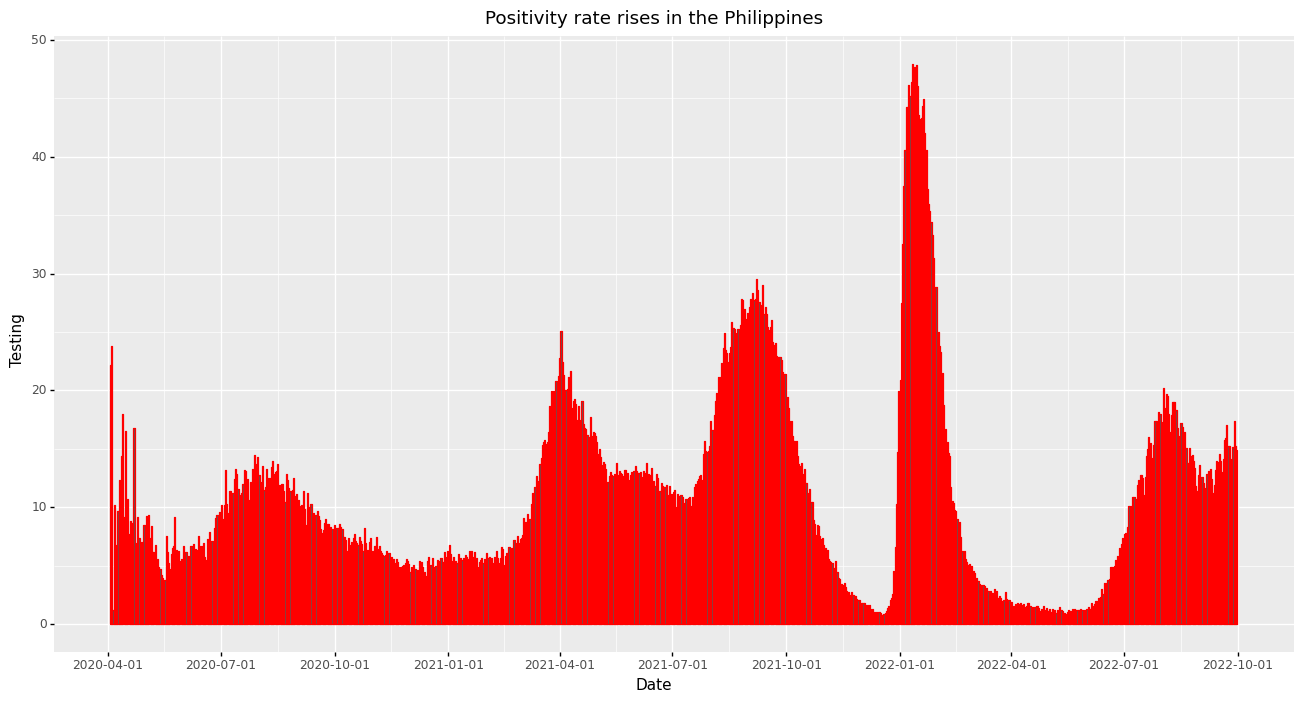

<ggplot: (380466516)>

In [67]:
(
    ggplot(df_pos2, aes('date', 'testing')) +
           geom_col(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Testing", title="Positivity rate rises in the Philippines")
)

# Save to CSVs

Just remove the hashtags!

While your testing data is in one CSV, cases are not. So now, you have the option to save it into one CSV. Note that you do not need to do this if you're using the dataframes (df) you generated above to process the data in Jupyter Notebook anytime.

### For mapping purposes

These CSVs were used as source to generate js files in [covid-19 map](https://github.com/pmagtulis/covid-ph-map.git)

In [68]:
# df_pos2.to_csv('positivity_rates.csv')
# case_roll.to_csv('covid_rolling.csv')
# test_roll.to_csv('daily-test.csv')

### Entire case file from DOH

In [69]:
#df.to_csv("covidcases.csv", index=False)
#pd.read_csv("covidcases.csv")

### Provincial cases per day

In [70]:
#df_prov.to_csv("covid_prov.csv")
#pd.read_csv("covid_prov.csv")

### Municipal cases total

In [71]:
#df_munc.to_csv("covid_munc.csv")
#pd.read_csv("covid_munc.csv")